# Description:

* calculations for modeling fragments in a CsCl gradient under non-equilibrium conditions

# Notes

* Good chapter on determining G+C content from CsCl gradient analysis
  * http://www.academia.edu/428160/Using_Analytical_Ultracentrifugation_of_DNA_in_CsCl_Gradients_to_Explore_Large-Scale_Properties_of_Genomes

* http://www.analyticalultracentrifugation.com/dynamic_density_gradients.htm

* Meselson et al. - 1957 - Equilibrium Sedimentation of Macromolecules in Den

* Vinograd et al. - 1963 - Band-Centrifugation of Macromolecules and Viruses 

* http://onlinelibrary.wiley.com.proxy.library.cornell.edu/doi/10.1002/bip.360101011/pdf


## Ultracentrigation book
http://books.google.com/books?hl=en&lr=&id=vxcSBQAAQBAJ&oi=fnd&pg=PA143&dq=Measurement+of+Density+Heterogeneity+by+Sedimentation+in&ots=l8ObYN-zVv&sig=Vcldf9_aqrJ-u7nQ1lBRKbknHps#v=onepage&q&f=false


## Forum info
* http://stackoverflow.com/questions/18624005/how-do-i-perform-a-convolution-in-python-with-a-variable-width-gaussian
* http://timstaley.co.uk/posts/convolving-pdfs-in-python/


## Possible workflows:

### KDE convolution
* KDE of fragment GC values
* bandwidth cross validation: https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
* convolution of KDE with diffusion function:
	* gaussian w/ mean of 0 and scale param = 44.5 (kb) / (mean fragment length)
		* http://www.academia.edu/428160/Using_Analytical_Ultracentrifugation_of_DNA_in_CsCl_Gradients_to_Explore_Large-Scale_Properties_of_Genomes
	* http://nbviewer.ipython.org/github/timstaley/ipython-notebooks/blob/compiled/probabilistic_programming/convolving_distributions_illustration.ipynb

## variable KDE 
* variable KDE of fragment GC values where kernel sigma is determined by mean fragment length
	* gaussian w/ scale param = 44.5 (kb) / fragment length



# Standard deviation of homogeneous DNA fragments

Vinograd et al., 1963; (band-centrifugation): 

\begin{align}
\sigma^2 = \frac{r_0}{r_0^0} \left\{ \frac{r_0}{r_0^0} + 2D \left( t - t^0 \right) \right\}
\end{align}

## Standard deviation of Gaussian band (assuming equilibrium), Meselson et al., 1957:

\begin{align}
\sigma^2 = -\sqrt{w} \\
w = \textrm{molecular weight}
\end{align}

## Standard deviation of Gaussian band at a given time, Meselson et al., 1957:

\begin{equation}
t^* = \frac{\sigma^2}{D} \left(ln \frac{L}{\sigma} + 1.26 \right), \quad L\gg\sigma \\
\sigma^2 = \textrm{stdev at equilibrium} \\
L = \textrm{length of column}
\end{equation}




* Gaussian within 1% of equillibrium value from center.
* ! assumes density gradient established at t = 0


### Alternative form (from Birne and Rickwood 1978; eq 6.22):

\begin{align}
t = \frac{\beta^{\circ}(p_p - p_m)}{w^4 r_p^2 s} \left(1.26 + ln \frac{r_b - r_t}{\sigma}\right)
\end{align}


\begin{equation}
t = \textrm{time in seconds} \\
\beta^{\circ} = \beta^{\circ} \textrm{ of salt forming the density gradient (CsCl = ?)} \\
p_p = \textrm{buoyant density of the the particle at equilibrium} \\
p_m = \textrm{average density of the medium} \\
w = \textrm{angular velocity} \\
r_p = \textrm{distance (cm) of particle from from the axis of rotation (at equilibrium)} \\
s = \textrm{sedimentation rate} (S_{20,w} * 10^{-13}) \\
r_b = \textrm{distance to top of gradient (cm)} \\
r_t = \textrm{distance to bottom of gradient (cm)} \\
r_b - r_t = \textrm{length of gradient (L)}
\end{equation}


### Solving for sigma:

\begin{align}
\sigma = \frac{L}{e^{\left(\frac{t w^4 r_p^2 s}{\beta^{\circ}(p_p - p_m)} - 1.26\right)}}
\end{align}

### sigma (alternative; but assuming sedimentation equilibrium reached; no time component)

\begin{align}
{\sigma} = \frac{\theta}{M_{app}} \frac{RT}{ \frac{w^2r_c}{\beta} * w^2r_o }
\end{align}


\begin{equation}
{\theta} = \textrm{buoyant dnesity of the macromolecules} \\
M_{app} = \textrm{apparent molecular weight oif the solvated macromolecules} \\
R = \textrm{universal gas constant} \\
T = \textrm{Temperate in K} \\
w = \textrm{angular velocity} \\
\beta^{\circ} = \beta^{\circ} \textrm{ coef. of salt forming the density gradient} \\
r_c = \textrm{isoconcentration point} \\
r_o = \textrm{distance (cm) of particle from from the axis of rotation (at equilibrium)} \\
\end{equation}

## Clay et al., 2003 method (assumes sedimentation equilibrium)

\begin{align}
\sigma = \sqrt{\frac{\rho R T}{B^2 G M_C l}} 
\end{align}

\begin{equation}
{\rho} = \textrm{buoyant dnesity of the macromolecules} \\
R = \textrm{universal gas constant} \\
T = \textrm{Temperate in K} \\
\beta = \beta^{\circ} \textrm{ coef. of salt forming the density gradient} \\
M_C =  \textrm{molecular weight per base pair of dry cesium DNA} \\
G = \textrm{Constant from Clay et al., 2003 (7.87x10^-10) } \\
l = \textrm{fragment length (bp)} \\
\end{equation}


# Variables specific to the Buckley lab setup

\begin{equation}
\omega = (2\pi \times \textrm{RPM}) /60, \quad \textrm{RPM} = 55000 \\
\beta^{\circ} = 1.14 \times 10^9 \\
r_b = 4.85 \\
r_t = 2.6 \\
L = r_b - r_t \\
s = S_{20,w} * 10^{-13} \\
S_{20,w} = 2.8 + 0.00834 * (l*666)^{0.479}, \quad \textrm{where l = length of fragment; S in Svedberg units} \\
p_m = 1.7 \\
p_p = \textrm{buoyant density of the particle in CsCl} \\
r_p = ? \\
t = \textrm{independent variable}
\end{equation}


__isoconcentration point__

\begin{equation}
r_c = \sqrt{(r_t^2 + r_t * r_b + r_b^2)/3}
\end{equation}

__r<sub>p</sub> in relation to the particle's buoyant density__

\begin{equation}
r_p = \sqrt{ ((p_p-p_m)\frac{2\beta^{\circ}}{w}) + r_c^2 } \\
p_p = \textrm{buoyant density}
\end{equation}

__buoyant density of a DNA fragment in CsCl__

\begin{equation}
p_p = 0.098F + 1.66, \quad \textrm{where F = G+C molar fraction}
\end{equation}


__info needed on a DNA fragment to determine it's sigma of the Guassian distribution__

* fragment length
* fragment G+C

# Coding equations

In [178]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [179]:
%%R
library(dplyr)
library(tidyr)
library(ggplot2)
library(gridExtra)

In [498]:
%%R


GC2MW = function(x){ 
    A = 313.2
    T = 304.2
    C = 289.2
    G = 329.2
    GC = G + C
    AT = A + T
    x = x / 100
    x*GC + (1-x)*AT  
}


GC2BD = function(GC){
    # GC = percentage
    BD = GC / 100 * 0.098 + 1.66
    return(BD)
}

calc_BD_macro = function(p_i, w, B, r)

rpm2w2 = function(rpm){
    x = 2 * pi * rpm / 60
    return(x**2)
}

calc_R_c = function(r_t, r_b){
    x = r_t**2 + r_t * r_b + r_b**2
    return(sqrt(x/3))
}


calc_R_p = function(p_p, p_m, B, w, r_c){
    # distance of the particle from the axis of rotation (at equilibrium)
    x = ((p_p - p_m) * (2 * B / w)) + r_c**2
    return(sqrt(x))
}

calc_S = function(l, GC){
    # l = dsDNA length (bp)
    MW = GC2MW(GC)
    S = 0.00834 * (l * MW)**0.479 + 2.8
    S = S * 1e-13
    return(S)
}

calc_dif_sigma_OLD = function(L, w, r_p, S, t, B, p_p, p_m){
    nom = w**2 * r_p**2 * S 
    denom = B * (p_p - p_m)
    x = nom / denom * t - 1.26
    sigma = L / exp(x)
    return(sigma)
}
    
calc_dif_sigma = function(L, w, r_c, S, t, B, p_p, p_m){
    nom = w**2 * r_c**2 * S 
    denom = B * (p_p - p_m)
    x = nom / denom * t - 1.26
    sigma = L / exp(x)
    return(sigma)
}

R_p2BD = function(r_p, p_m, B, w, r_c){
    # converting a distance from center of rotation of a particle to buoyant density
    ## inverse of `calc_R_p`
    nom = (r_p**2 - r_c**2) * w
    return(nom / (2 * B) + p_m)
}

sigma2BD = function(r_p, sigma, p_m, B, w, r_c){
    BD_low = R_p2BD(r_p - sigma, p_m, B, w, r_c)
    BD_high = R_p2BD(r_p + sigma, p_m, B, w, r_c)
    return(BD_high - BD_low)
}
    
time2eq = function(B, p_p, p_m, w, r_c, s, L, sigma){
    x = (B * (p_p - p_m)) / (w**2 * r_c**2 * s) 
    y = 1.26 + log(L / sigma)
    return(x * y)
}
    

# Time to equilibrium

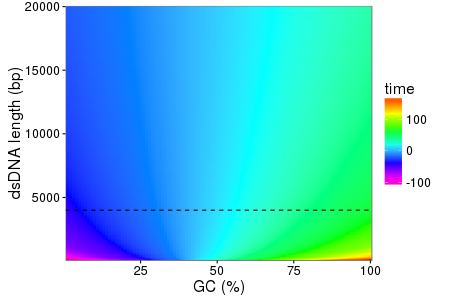

In [460]:
%%R -w 450 -h 300
# time to eq 

calc_time2eq = function(x, B, L, rpm, r_t, r_b, sigma, p_m){
    l = x[1]
    GC = x[2]
    s = calc_S(l, GC)
    w = rpm2w2(rpm)
    p_p = GC2BD(GC)
    r_c = calc_R_c(r_t, r_b)
    #r_p = calc_R_p(p_p, p_m, B, w, r_c)
    t = time2eq(B, p_p, p_m, w, r_c, s, L, sigma)
    t = t / 360
    return(t)
} 

rpm = 55000 
B = 1.14e9
r_b = 4.85
r_t = 2.6
L = r_b - r_t
p_m = 1.7

l = seq(100,20000,100)          # bp
GC = 1:100               # percent
sigma = 0.01

df = expand.grid(l, GC)
df$t = apply(df, 1, calc_time2eq, B=B, L=L, rpm=rpm, r_t=r_t, r_b=r_b, sigma=sigma, p_m=p_m)
colnames(df) = c('length', 'GC', 'time')
df %>% head

cols = rev(rainbow(12))
p1 = ggplot(df, aes(GC, length, fill=time)) +
    geom_tile() +
    scale_x_continuous(expand=c(0,0)) +
    scale_y_continuous(expand=c(0,0)) +
    scale_fill_gradientn(colors=cols) +
    geom_hline(yintercept=4000, linetype='dashed', color='black') +
    #geom_vline(xintercept=60*60*66, linetype='dashed', color='black') +
    labs(x='GC (%)', y='dsDNA length (bp)') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

p1

# sigma as a function of time & fragment length

In [404]:
%%R
rpm = 55000
B = 1.14e9
r_b = 4.85
r_t = 2.6
L = r_b - r_t
p_m = 1.7

l = 500          # bp
GC = 50           # pebrcent
t = 60 * 60 * 66     # sec

S = calc_S(l, GC)
w2 = rpm2w2(rpm)
p_p = GC2BD(GC)
r_c = calc_R_c(r_t, r_b)
r_p = calc_R_p(p_p, p_m, B, w2, r_c)
sigma = calc_dif_sigma(L, w2, r_p, S, t, B, p_p, p_m)
print(sigma)
#sigma_BD = sigma2BD(r_p, sigma, p_m, B, w2, r_c)
#print(sigma_BD)

[1] 9.800228e-105


In [405]:
%%R

#-- alternative calculation
p_p = 1.7

M = l * 882
R = 8.3144598   #J mol^-1 K^-1
T = 293.15

calc_stdev(p_p, M, R, T, w2, r_c, B, r_p)

[1] 6.665251e-10


# Graphing sigma as a function of time & fragment length

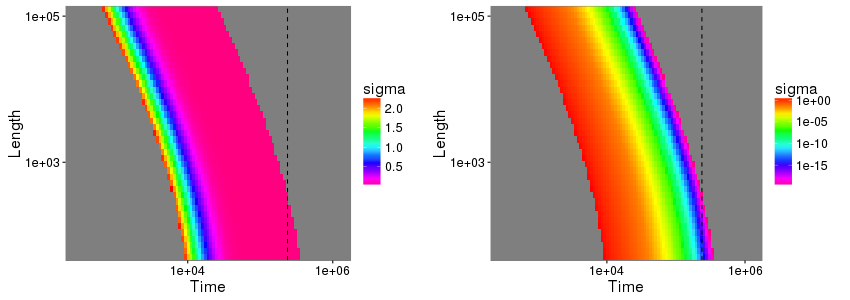

In [447]:
%%R -h 300 -w 850
calc_sigma_BD = function(x, rpm, GC, r_t, r_b, p_m, B, L){
    l = x[1]
    t = x[2]
    S = calc_S(l, GC)
    w2 = rpm2w2(rpm)
    p_p = GC2BD(GC)
    r_c = calc_R_c(r_t, r_b)
    r_p = calc_R_p(p_p, p_m, B, w2, r_c)
    sigma = calc_dif_sigma(L, w2, r_p, S, t, B, p_p, p_m)
    if (sigma > L){
        return(NA)
    } else {
        return(sigma)
    }
}


# params
GC = 50
rpm = 55000
B = 1.14e9
r_b = 4.85
r_t = 2.6
L = r_b - r_t
p_m = 1.66

# pairwise calculations of all parameters
l = 50**seq(1,3, by=0.05)
t = 6**seq(3,8, by=0.05)
df = expand.grid(l, t)
df$sigma = apply(df, 1, calc_sigma_BD, rpm=rpm, GC=GC, r_t=r_t, r_b=r_b, p_m=p_m, B=B, L=L)
colnames(df) = c('length', 'time', 'sigma')
df= df %>%
    mutate(sigma = ifelse((sigma < 1e-20 | sigma > 1e20), NA, sigma))

# plotting
cols = rev(rainbow(12))
p1 = ggplot(df, aes(time, length, fill=sigma)) +
    geom_tile() +
    scale_x_log10(expand=c(0,0)) +
    scale_y_log10(expand=c(0,0)) +
    scale_fill_gradientn(colors=cols) +
    #geom_hline(yintercept=4000, linetype='dashed', color='black') +
    geom_vline(xintercept=60*60*66, linetype='dashed', color='black') +
    labs(x='Time', y='Length') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

p2 = p1 + scale_fill_gradientn(colors=cols, trans='log10')
grid.arrange(p1, p2, ncol=2)

### Low GC

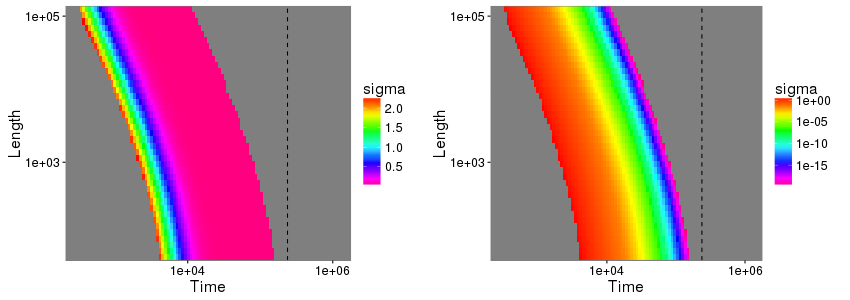

In [453]:
%%R -h 300 -w 850

# params
GC = 20
rpm = 55000
B = 1.14e9
r_b = 4.85
r_t = 2.6
L = r_b - r_t
p_m = 1.66

# pairwise calculations of all parameters
l = 50**seq(1,3, by=0.05)
t = 6**seq(3,8, by=0.05)
df = expand.grid(l, t)
df$sigma = apply(df, 1, calc_sigma_BD, rpm=rpm, GC=GC, r_t=r_t, r_b=r_b, p_m=p_m, B=B, L=L)
colnames(df) = c('length', 'time', 'sigma')
df= df %>%
    mutate(sigma = ifelse((sigma < 1e-20 | sigma > 1e20), NA, sigma))

# plotting
cols = rev(rainbow(12))
p1 = ggplot(df, aes(time, length, fill=sigma)) +
    geom_tile() +
    scale_x_log10(expand=c(0,0)) +
    scale_y_log10(expand=c(0,0)) +
    scale_fill_gradientn(colors=cols) +
    #geom_hline(yintercept=4000, linetype='dashed', color='black') +
    geom_vline(xintercept=60*60*66, linetype='dashed', color='black') +
    labs(x='Time', y='Length') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

p2 = p1 + scale_fill_gradientn(colors=cols, trans='log10')
grid.arrange(p1, p2, ncol=2)

### High GC

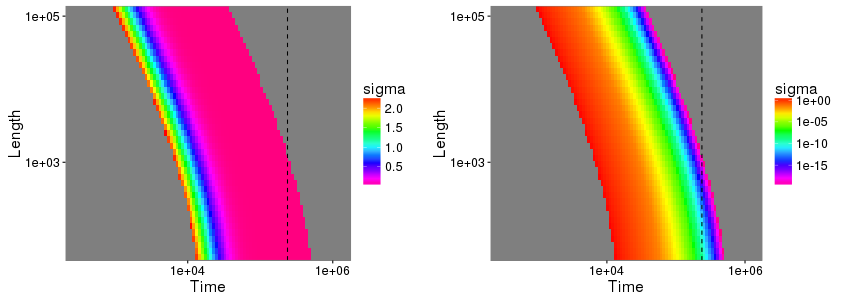

In [454]:
%%R -h 300 -w 850

# params
GC = 80
rpm = 55000
B = 1.14e9
r_b = 4.85
r_t = 2.6
L = r_b - r_t
p_m = 1.66

# pairwise calculations of all parameters
l = 50**seq(1,3, by=0.05)
t = 6**seq(3,8, by=0.05)
df = expand.grid(l, t)
df$sigma = apply(df, 1, calc_sigma_BD, rpm=rpm, GC=GC, r_t=r_t, r_b=r_b, p_m=p_m, B=B, L=L)
colnames(df) = c('length', 'time', 'sigma')
df= df %>%
    mutate(sigma = ifelse((sigma < 1e-20 | sigma > 1e20), NA, sigma))

# plotting
cols = rev(rainbow(12))
p1 = ggplot(df, aes(time, length, fill=sigma)) +
    geom_tile() +
    scale_x_log10(expand=c(0,0)) +
    scale_y_log10(expand=c(0,0)) +
    scale_fill_gradientn(colors=cols) +
    #geom_hline(yintercept=4000, linetype='dashed', color='black') +
    geom_vline(xintercept=60*60*66, linetype='dashed', color='black') +
    labs(x='Time', y='Length') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

p2 = p1 + scale_fill_gradientn(colors=cols, trans='log10')
grid.arrange(p1, p2, ncol=2)

## Plotting Clay et al,. method

In [502]:
%%R
calc_dif_sigma_Clay = function(rho, R, T, B, G, M, l){
    sigma = sqrt((rho*R*T)/(B**2*G*M*l))
    return(sigma)
}

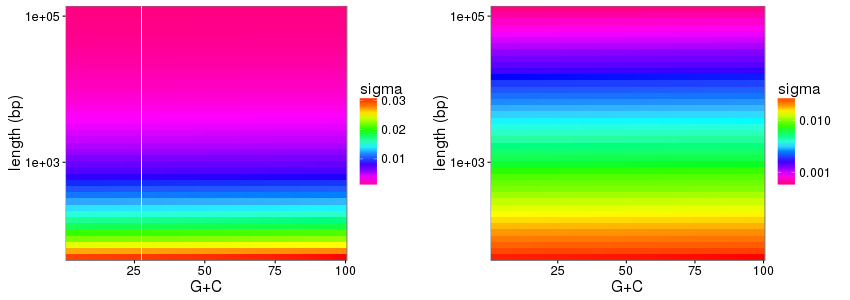

In [511]:
%%R -w 850 -h 300

wrap_calc_sigma_Clay = function(x, R, T, B, G, m){
    l= x[1]
    GC = x[2]
    rho = GC2BD(GC)
    sigma = calc_dif_sigma_Clay(rho, R, T, B, G, m, l)
    return(sigma)
}

# params
R = 8.3145e7
T = 293.15
G = 7.87e-10
M = 882
B = 1.14e9

l = 50**seq(1,3, by=0.05)
GC = 1:100

# pairwise calculations of all parameters

df = expand.grid(l, GC)

df$sigma = apply(df, 1, wrap_calc_sigma_Clay, R=R, T=T, B=B, G=G, m=M)
colnames(df) = c('length', 'GC', 'sigma')


# plotting
cols = rev(rainbow(12))
p1 = ggplot(df, aes(GC, length, fill=sigma)) +
    geom_tile() +
    scale_y_log10(expand=c(0,0)) +
    scale_x_continuous(expand=c(0,0)) +
    scale_fill_gradientn(colors=cols) +
    labs(y='length (bp)', x='G+C') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

p2 = p1 + scale_fill_gradientn(colors=cols, trans='log10')
grid.arrange(p1, p2, ncol=2)

# --Sandbox--

# Graphing the equations above

In [ ]:
%pylab inline

In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mixture
#import sklearn.mixture as mixture

## Generating fragments

In [ ]:
n_frags = 10000
frag_GC = np.random.normal(0.5,0.1,n_frags)
frag_GC[frag_GC < 0] = 0
frag_GC[frag_GC > 1] = 1
frag_len = np.random.normal(10000,1000,n_frags)

In [ ]:
ret = plt.hist2d(frag_GC, frag_len, bins=100)

## Setting variables

In [ ]:
RPM = 55000
omega = (2 * np.pi * RPM) / 60

beta_o = 1.14 * 10**9

radius_bottom = 4.85 
radius_top = 2.6 
col_len = radius_bottom - radius_top

density_medium = 1.7

## Calculation functions

In [ ]:
# BD from GC
frag_BD = 0.098 * frag_GC + 1.66

ret = plt.hist(frag_BD, bins=100)

In [ ]:
sedimentation = (frag_len*666)**0.479 * 0.00834 + 2.8   # l = length of fragment

ret = plt.hist(sedimentation, bins=100)

In [ ]:
# sedimentation as a function of fragment length 
len_range = np.arange(1,10000, 100)

ret = plt.scatter(len_range, 2.8 + 0.00834 * (len_range*666)**0.479 )

In [ ]:
# isoconcentration point
iso_point = sqrt((radius_top**2 + radius_top * radius_bottom + radius_bottom**2)/3)
iso_point

In [ ]:
# radius of particle

#radius_particle = np.sqrt( (frag_BD - density_medium)*2*(beta_o/omega) + iso_point**2 )


#ret = plt.hist(radius_particle)

# Testing out speed of mixture models

In [ ]:
n_dists = 10
n_samp = 10000

In [ ]:
def make_mm(n_dists):
    dist_loc = np.random.uniform(0,1,n_dists)
    dist_scale = np.random.uniform(0,0.1, n_dists)
    dists = [mixture.NormalDistribution(x,y) for x,y in zip(dist_loc, dist_scale)]
    eq_weights = np.array([1.0 / n_dists] * n_dists)
    eq_weights[0] += 1.0 - np.sum(eq_weights)
    return mixture.MixtureModel(n_dists, eq_weights, dists)

In [ ]:
mm = make_mm(n_dists)

In [ ]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

In [ ]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

In [ ]:
n_dists = 1000
mm = make_mm(n_dists)

In [ ]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

In [ ]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

In [ ]:
n_dists = 10000
mm = make_mm(n_dists)

In [ ]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

In [ ]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

In [ ]:
n_samp = 100000

In [ ]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

In [ ]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

__Notes:__

* a mixture model with many distributions (>1000) is very slow for sampling

In [ ]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(1, 1, 100)
H, xedges, yedges = np.histogram2d(y, x, bins=100)

In [ ]:
H

***
***

# Workflow for modeling DNA fragment locations in a gradient

For each genome in mock community, simulate N fragments and calculate their Guassian distributions in the gradient.
Create a mixture model of those Guassian distributions to sample A<sub>a</sub> fragments,
where A<sub>a</sub> = the absolute abundance of the taxon in the mock community.
One mixture model per genome.

## User defined:

* Rotor specs
* cfg parameters (RPM, time)

## Generate fragment density distributions

* For each genome in the mock community:
  * Simulate fragments
  * Calculate sigma of Gaussian density distribution
  * Create mixture model from all Gaussians of the fragments
  
## Simulate fraction communities

* For each genome in mock community:
  * sample fragments from mixture model based on total abundance of taxon in mock community
  * bin fragments into gradient fractions